In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style
sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

In [2]:
parquet_file = "../data/raw/k6_metrics/ack_latency.parquet"
df = pd.read_parquet(parquet_file)
print(f"Loaded {len(df)} records from {parquet_file}")
df.head()

Loaded 61 records from ../data/raw/k6_metrics/ack_latency.parquet


,result,table,_start,_stop,_time,_measurement,environment,robot_id,scenario,source_timestamp,value
0,_result,0,2026-01-02 13:16:25.775071+00:00,2026-01-02 13:31:25.775071+00:00,2026-01-02 13:24:34.791685+00:00,ack_latency,edge,robot_1,smoke,1767360274428,360.0
1,_result,1,2026-01-02 13:16:25.775071+00:00,2026-01-02 13:31:25.775071+00:00,2026-01-02 13:24:35.647831+00:00,ack_latency,edge,robot_1,smoke,1767360275428,217.0
2,_result,2,2026-01-02 13:16:25.775071+00:00,2026-01-02 13:31:25.775071+00:00,2026-01-02 13:24:36.646615+00:00,ack_latency,edge,robot_1,smoke,1767360276429,216.0
3,_result,3,2026-01-02 13:16:25.775071+00:00,2026-01-02 13:31:25.775071+00:00,2026-01-02 13:24:37.645597+00:00,ack_latency,edge,robot_1,smoke,1767360277428,215.0
4,_result,4,2026-01-02 13:16:25.775071+00:00,2026-01-02 13:31:25.775071+00:00,2026-01-02 13:24:38.518753+00:00,ack_latency,edge,robot_1,smoke,1767360278429,88.0


In [3]:
df["robot_id"].unique()

array(['robot_1'], dtype=object)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   result            61 non-null     object             
 1   table             61 non-null     int64              
 2   _start            61 non-null     datetime64[ns, UTC]
 3   _stop             61 non-null     datetime64[ns, UTC]
 4   _time             61 non-null     datetime64[ns, UTC]
 5   _measurement      61 non-null     object             
 6   environment       61 non-null     object             
 7   robot_id          61 non-null     object             
 8   scenario          61 non-null     object             
 9   source_timestamp  61 non-null     object             
 10  value             61 non-null     float64            
dtypes: datetime64[ns, UTC](3), float64(1), int64(1), object(6)
memory usage: 5.4+ KB


In [5]:
print("Ack Latency Statistics (seconds):")
df["value"].describe()

Ack Latency Statistics (seconds):


count     61.000000
mean      52.065574
std       60.861282
min       24.000000
25%       25.000000
50%       26.000000
75%       39.000000
max      360.000000
Name: value, dtype: float64

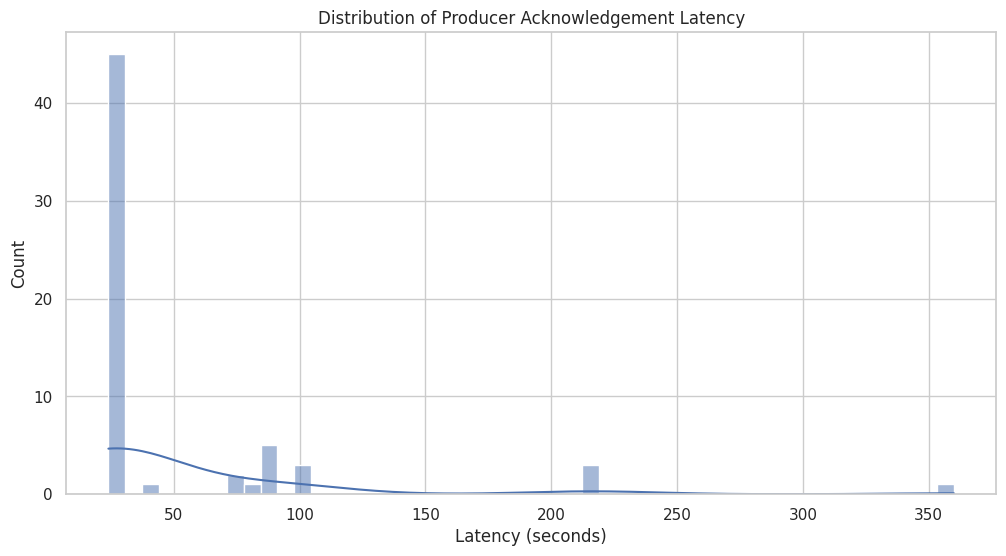

In [6]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x="value", kde=True, bins=50)
plt.title("Distribution of Producer Acknowledgement Latency")
plt.xlabel("Latency (seconds)")
plt.ylabel("Count")
plt.show()

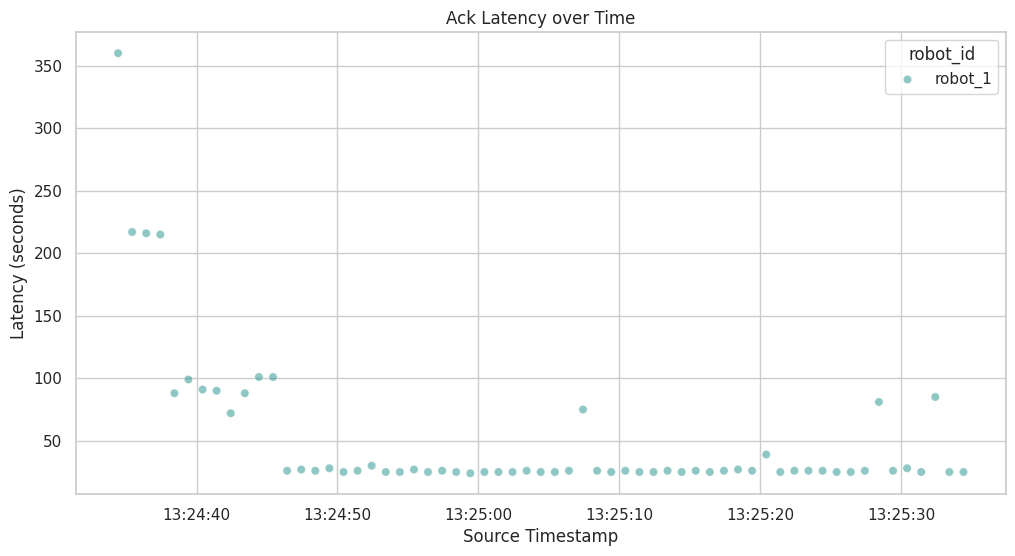

In [8]:
# Convert source_timestamp to datetime
try:
    df['timestamp_dt'] = pd.to_datetime(pd.to_numeric(df['source_timestamp']), unit='ms')
except Exception as e:
    print(f"Could not parse timestamp: {e}")

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x="timestamp_dt", y="value", alpha=0.5, hue="robot_id", palette="viridis", legend=True)
plt.title("Ack Latency over Time")
plt.xlabel("Source Timestamp")
plt.ylabel("Latency (seconds)")
plt.show()

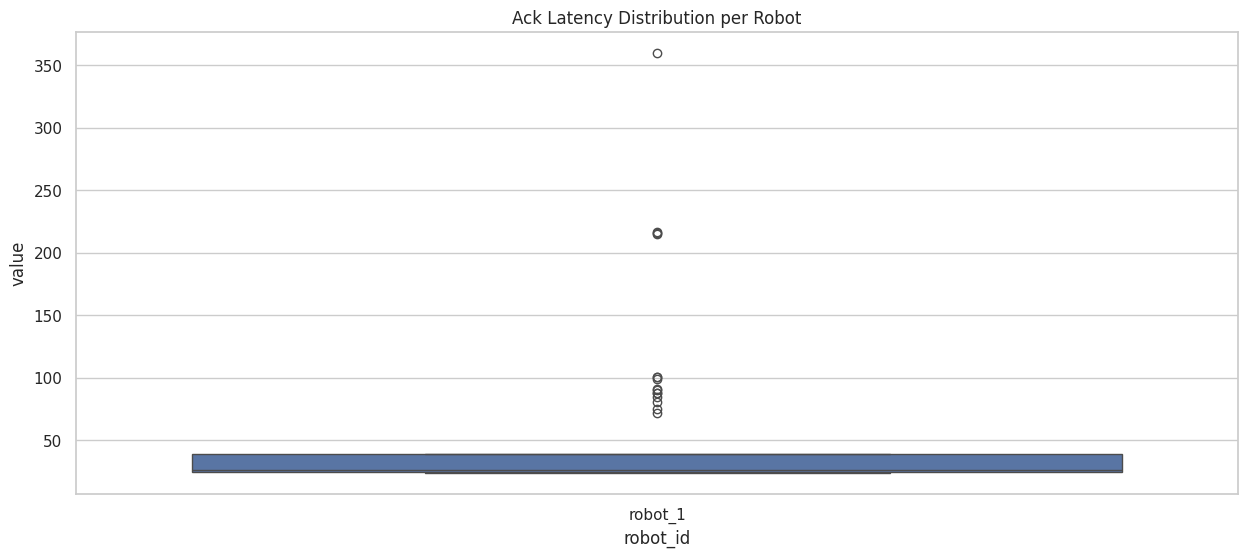

In [10]:
import numpy as np 

if 'robot_id' in df.columns:
    plt.figure(figsize=(15, 6))
    
    robot_counts = df['robot_id'].nunique()
    
    if robot_counts <= 20:
        sns.boxplot(data=df, x="robot_id", y="value")
        plt.title("Ack Latency Distribution per Robot")
    else:
        print(f"Too many robots ({robot_counts}) for boxplot. Showing top 10 robots by max latency.")
        
        # Find robots with high latency
        max_latency_by_robot = df.groupby('robot_id')['value'].max().sort_values(ascending=False).head(10)
        top_robots = df[df['robot_id'].isin(max_latency_by_robot.index)]
        
        sns.boxplot(data=top_robots, x="robot_id", y="value")
        plt.ylim(0, 0.10)
        plt.yticks(np.arange(0, 0.10, 0.02))
        plt.title("Ack Latency Distribution for Top 10 High-Latency Robots")

    plt.show()